# Brainwaves for Hackers 3.0
## Using our Python tools to understand our brain
### Andreas Klostermann



In [1]:
%load_ext autoreload
%autoreload 2

In [18]:
%matplotlib inline
import IPython
from presentation import *
ep2016_barria_2_style()

This talk is about how to read and interpret brainwaves using Python and its toolset. There have been two prior versions of this talk, and you don't need to have seen the previous two to get something out of this talk, but if you have seen them, you'll still hear something new.

What I represent here are entirely my own opinions, and nothing I say and write here should be taken as medical advice. I wrote this software mainly out of curiosity, and this is not part of any commercial or academic endeavour.



# What are brainwaves?

![alt text](neuron_cell_1.png "Logo Title Text 1")


You probably know that your brain contains billions of brain cells. These brain cells communicate with each other using electrical signals. Whenever one brain cell fires a signal, an extremely tiny potential wave or signal travels outward from the cell.

With the help of very sensitive instruments, we can measure the summation of these signals on the skin of the skalp. We can't ever read the signal of a single cell, however, instead what we see is a summation of billions of cells.

The medical term for brainwaves is electroencephalography, EEG for short.

# What can you do with brainwaves?

- Neurofeedback Training
- Simple neuroscientific experiments
- Brain Computer Interfaces (BCI)
- (diagnose neurological problems)

This talk is about consumer grade EEG devices. These are somewhat limited in their sensitivity and signal quality, so you are not allowed to use them for medical diagnostics and such. But on the other hand they are a lot easier to set up and a lot cheaper than medical grade or research grade devices.

### Neurofeedback Training

Neurofeedback means that you feed back information about the user's mental state back to the user. Using this feedback the user can then practice and learn to control his mental state. In numerous scientific studies this has been shown to help with epilepsy, Attention Deficit/Hyperactivity disorder, and other conditions. But please consult a doctor if you want to use neurofeedback on yourself for a medical reason, and you shouldn't do such treatment on your own. For experimentation, unless you have a neurological condition, it should be safe.

### Experiments

The devices are good enough for simple neurological experiments and I will show one later.

### Brain Computer Interfaces (BCI)

BCI applications try to use brainwaves as an input for a computer program. It's very difficult to do this with the devices I'll show you, and BCI is not my personal interest. In a very limited way however, this is possible.

# Neurosky Mindwave

![alt text](MindWave_Headset.jpg "Logo Title Text 1")


The Neurosky Mindwave is a bluetooth connected headset, which can measure one channel on the front of the head. It's main design goal is neurofeedback training through games. The technology inside the headset is modular, so that it can be used in different devices. For example there are board games, and a version which has cat ears mounted on servo motors, and the brain wave signals control how the ears move.


![alt text](Muse_Logo_2.png "Logo Title Text 1")
![alt text](muse-sort---nyt-logo-1-4.jpg "Logo Title Text 1")

The Interaxon Muse is another bluetooth headset. It is mainly designed to be used by the Muse App, which offers Neurofeedback for Meditation.

The Muse can record 4 channels of EEG and also records Accelerometer data at 50hz. It's however three times more expensive.

The Muse knows several "presets", which offer different configurations. The original firmware only supported what they called "compressed packets", which means they use a sophisticated variable bitlength scheme to encode the EEG data. The documentation says that this was necessary because of limitations in iOS. I never really figured out how to read these packets.

Other configurations, called "research presets" don't compress the data, but they weren't available with the firmware that was originally distributed by the Android app. Recently they changed, that, luckily, now I can use the research presets, which also offer a higher sampling rate of 500 samples per second.

I have the 2014 Version of the device. There is now a new one which has different presets yet again. The research presets are gone, now all consumer presets are uncompressed and run a sampling rate of 200 samples per second.

# Comparison

| | Neurosky Mindwave | Interaxon Muse|
|--|-------------------|----------------|
| EEG Channels | 1 | 4 |
| Accelerometer Channels | |2 |
| Sample Rate | 512 Hz| 500hz (200Hz)|
| Sensors | "dry"| "dry"|
| Precomputed Measures| "attention" and "meditation"|  |
| "Hackability" | Excellent | Good |

First of all, the Mindwave is a lot cheaper. The Muse theoretically offers more and better data, but it may be hard to actually exploit this data. On the other hand, the Mindwave only has one channel, and some neurofeedback protocols require two or more of these.

The Mindwave seems to be especially focused on being hackable. The raw signal arrives in a preprocessed form, which makes dealing with it slightly easier. The protocol also provides two values called "meditation" and "attention", which are computed inside the headset. This makes the headset useful even to a computer as simple as the arduino.

I'd say the Muse is less "hackable" than the Mindwave. It's more difficult to get the SDKs working, and the protocol and its documentation is confusing. There is an SDK for the Muse, but I prefer to interact with the headset directly in Python. The raw signal is much more "raw" than in the Neurosky Mindwave. This means you have more control over the signal analysis, but it also means you have to do all of the analysis yourself. Clearly it requires more processing power, but this hardly matters in practice.

# OpenBCI


![alt text](openbci_board.png "Logo Title Text 1")

By <a href="//commons.wikimedia.org/w/index.php?title=User:Omphalosskeptic&amp;action=edit&amp;redlink=1" class="new" title="User:Omphalosskeptic (page does not exist)">Omphalosskeptic</a> - <span class="int-own-work" lang="en">Own work</span>, <a href="http://creativecommons.org/licenses/by-sa/4.0" title="Creative Commons Attribution-Share Alike 4.0">CC BY-SA 4.0</a>, https://commons.wikimedia.org/w/index.php?curid=37520130


# Pysiology

- Python library for realtime analysis of physiological signals
- supports Mindwave and Muse
- supports multiple, irregular timeseries
- can stream to Jupyter notebook

Pysiology is a library I started to experiment with physiological timeseries data, and especially to work with it in realtime. It's not that useful to other people yet, and I am probably the only user so far. But I think it could be useful for OpenBCI and other projects, too.

It contains parsers for both Mindwave and Muse protocols, and is designed for heterogenous timeseries, which means different sampling rates and also irregular sampling rates. EEG signals are recorded at a steady rate, but other stuff, like the attention/meditation values, or possibly other sensor data, arrive at slightly irregular intervals. 



# Realtime Data

In [6]:
from IPython.core import display
from matplotlib import pyplot as plt
import bokeh
import pysiology
import numpy as np
from pysiology.pyeeg import bin_power
from pysiology.notebook import Experiment, Analysis
from bokeh.plotting import figure, output_notebook, show
output_notebook()

Loading BokehJS ...

In [17]:
figure_realtime_1()

Stopped.


# Architecture

- AsyncIO server
    - connects to the headset over bluetooth
    - parses data
    - sends data to IPython kernel over websockets
- IPython Kernel
    - connects to AsyncIO server websocket
    - runs experiments
    - updates timeseries    
- Jupyter Notebook in the Browser
    - displays data and/or feedback
    - offers control over the experiment

Physiology runs a server process which handles the communication with the sensors and devices. It's a seperate process from the notebook stuff in order to be independent to what happens with the notebook, the kernel and the network. It hosts a websocket service, where other software can connect and request data.

So the Jupyter Notebook architecture is such that there is a central Tornado server to serve the notebook and handle the notebook files. Then there are so called Kernels, which can be in different programming languages and use different environments. These are seperate processes which communicate over ZeroMQ with the central Tornado server.

Originally, this was called the IPython Notebook, then the project changed to the "Jupyter" name. But the kernel, which runs your Python blocks in a notebook, is still called IPython. It has no direct connection to the browser side of things, instead, it sends messages to the central Jupyter server, and this then sends these messages over a websocket.

So the big secret to this interactivity is that the IPython kernel itself is a tornado application. It can do everything you can do with the Tornado framework for asynchronous programming, like connecting to the websocket of the pysiology server and reading data from it asynchronously.


## Handling Bluetooth



I'm using pybluez to run the bluetooth communications. The Python 3 standard library theoretically has its own functions to handle a bluetooth socket like any other socket.

One of the problems with Bluetooth in General is that it fails all the time. For example when the device is down, or it has just been disconnected or the device is out of range, or whatever other reason. The AsyncIO style really works well for this kind of troubleshooting.

Another problem is the timing. Both the Mindwave and the Muse don't transmit any information about the time of the samples. So in the pysiology server there is some logic to try and guess the time from the point when the first data was received and the known sample rate. It somewhat works, but it's not very precise and we never know the exact latency of the data. Which can be a problem sometimes.

# Discovery Requires Experimentation
(Daniel Whitehall in "Marvels Agent's of Shield")

I demoed the integration of realtime data before. These demonstrations use Experiment classes, which handle both the communication with the server and the recording of the data.

# Experiment Classes


In [112]:
class MuseAndMindwave(Experiment):
    muse = Muse("00:06:66:6F:F0:97", interval=0.25)
    mindwave = Mindwave("74:E5:43:BE:42:50", interval=0.25)

An experiment is defined by declaring devices. Currently I only have two device classes, Muse and Mindwave, but other devices could be integrated too. So this framework is capable of dealing with multiple devices at the same time.

# Experiment Classes (2)

In [ ]:
class MyExperiment(Experiment):
    muse = Muse("00:06:66:6F:F0:97", interval=0.1)


In [10]:
display = HTML(value="")
IPython.display.display(display)
exp = MyExperiment("muse_recording.hdf5")
@exp
def handler(experiment, msg):
    if not hasattr(experiment.muse, "AF7"):
        return
    display.value = "<h3>{s} seconds</h3>".format(s=len(experiment.muse.AF7)/500)

Stopped.


This example shows how to run an experiment and display some realtime information on the screen. The Experiment class is instantiated, optionally with a file name. This is where the information is recorded. If you run an experiment multiple times on the same file, each run is stored in a seperate hdf5 folder, so nothing is overwritten and you can easily have multiple recordings in the same file.

To run the experiment, the instance is used as a decorator on a handler function, which makes this very clean and easy to do. Everytime we get new data, this handler is called. The HTML widget is a great way to display generic information. Just update its HTML value and it will show up on the screen automatically.



# Experiment Classes (3)

In [123]:
exp.muse.AF7.head()

2016-07-19 16:00:37.621574656    12136
2016-07-19 16:00:37.623574784    12174
2016-07-19 16:00:37.625574656    12215
2016-07-19 16:00:37.627574784    12219
2016-07-19 16:00:37.629574656    12208
dtype: int64

This is all you need to access a timeseries on an experiment instance. These timeseries objects are automatically updated whenever new data becomes available. This makes it extremely easy to run interactive experiments.


# Analysis

The experiment instances save their data in an HDF5 file, one run after the other. Now there is a second class which can analyse these recordings.

The main way to analyse these experiments is by turning the timeseries data in a table with rows and columns. This is done by defining windows with a certain width and a certain step size, and then the columns are filled with computations over the data in this window.

# Correlations between channels

In [130]:
a = Analysis("correlation_1.hdf5")
windows = list(a.iterate_windows(window_size=3, step_size=1))

# Correlations between channels (2)

In [133]:
def process( start, end, run, run_number, muse, **kwargs):
    record = dict(eeg_length=len(muse['AF7']),)
    for name, ts in muse.items():
        record['%s_std' % name] = ts[1:].std()
        record['%s_mean' % name] = ts[1:].mean()
        record['%s_min' % name] = ts[1:].min()
        record['%s_max' % name] = ts[1:].max()
        if name in ['AF7', 'AF8','TP9','TP10']:
            bins = np.arange(0,40)
            abs_str, rel_str = bin_power(ts.values, bins, 500)
            beta_1 = rel_str[12:16].sum()
            alpha = rel_str[7:12].sum()
            record['%s_beta_1' % name] = beta_1
            record['%s_alpha' % name] = alpha
    return record

df = pd.DataFrame.from_records([process(**w) for w in windows])
df = df[(df.eeg_length>=1500) & (df.AF7_std<500)]

In [134]:
df.head()

,AF7_alpha,AF7_beta_1,AF7_max,AF7_mean,AF7_min,AF7_std,AF8_alpha,AF8_beta_1,AF8_max,AF8_mean,...,TP10_mean,TP10_min,TP10_std,TP9_alpha,TP9_beta_1,TP9_max,TP9_mean,TP9_min,TP9_std,eeg_length
3,0.018370,0.007961,14984.0,12390.638907,11641.0,459.958833,0.022096,0.008897,16772.0,12602.820786,...,12704.401732,11027.0,619.787680,0.096405,0.044462,19583.0,9822.439707,0.0,4120.819228,1502
4,0.018368,0.005757,14984.0,12237.185210,11155.0,463.555877,0.014456,0.010083,14857.0,12272.944037,...,12693.161226,11681.0,464.763003,0.114598,0.064535,24527.0,9201.682878,0.0,3301.369590,1502
5,0.020321,0.007195,14984.0,12169.742838,11155.0,495.732708,0.015687,0.010968,14857.0,12284.962692,...,12760.324450,11681.0,459.813783,0.061503,0.038736,24530.0,13242.073951,3057.0,5471.442498,1502
6,0.013693,0.006388,13066.0,12045.671552,11155.0,304.489986,0.012240,0.009736,13566.0,12203.656895,...,12468.300466,11612.0,376.142669,0.058114,0.036162,24530.0,12348.846103,0.0,6913.775189,1502
7,0.014872,0.008548,13052.0,12064.903398,10567.0,336.753485,0.015235,0.010375,13566.0,12277.578281,...,12396.358428,11612.0,350.526331,0.054022,0.037338,24530.0,14341.174550,0.0,7766.163838,1502


# Correlations between channels (3)

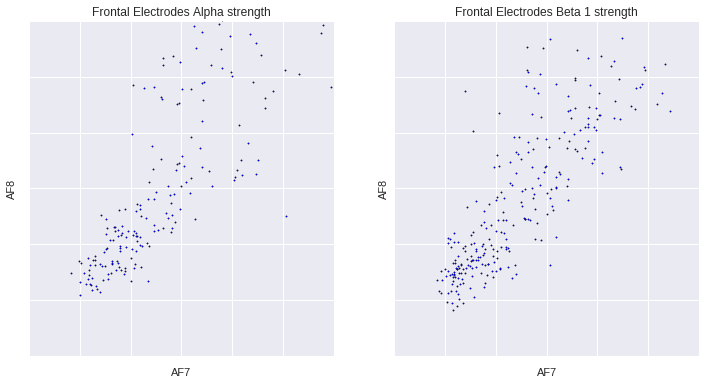

In [135]:
from presentation import figure_correlation_1
figure_correlation_1(df)
hide_code_in_slideshow()

# Correlations between Muse and Mindwave

In [13]:
a = Analysis("correlation_2.hdf5")
windows = a.iterate_windows(window_size=3, step_size=1)

def process( start, end, run, run_number, muse, mindwave, **kwargs):
    record = dict(eeg_length=len(muse['AF7']),)
    for name, ts in muse.items():
        record['%s_std' % name] = ts[1:].std()
        record['%s_mean' % name] = ts[1:].mean()
        record['%s_min' % name] = ts[1:].min()
        record['%s_max' % name] = ts[1:].max()
        if name in ['AF7', 'AF8','TP9','TP10']:
            bins = np.arange(0,40)
            abs_str, rel_str = bin_power(ts.values, bins, 500)
            beta_1 = rel_str[12:16].sum()
            alpha = rel_str[7:12].sum()
            record['%s_beta_1' % name] = beta_1
            record['%s_alpha' % name] = alpha
    
    raw = mindwave["raw"]
    record["mindwave_length"] = len(raw)
    record["mindwave_std"] = raw.values.std()
    if len(raw)>500:
        bins = np.arange(0,40)
        abs_str, rel_str = bin_power(raw.values, bins, 500)
        beta_1 = rel_str[12:16].sum()
        alpha = rel_str[7:12].sum()
        record["mindwave_alpha"] = alpha
        record["mindwave_beta_1"] = beta_1
    return record

df = pd.DataFrame.from_records([process(**w) for w in windows])
df = df[(df.eeg_length>=1500) & (df.AF7_std<500) & df.mindwave_std < 120]

/home/andi/anaconda3/envs/pysio/lib/python3.5/site-packages/numpy/core/_methods.py:82: RuntimeWarning: Degrees of freedom <= 0 for slice
  warnings.warn("Degrees of freedom <= 0 for slice", RuntimeWarning)


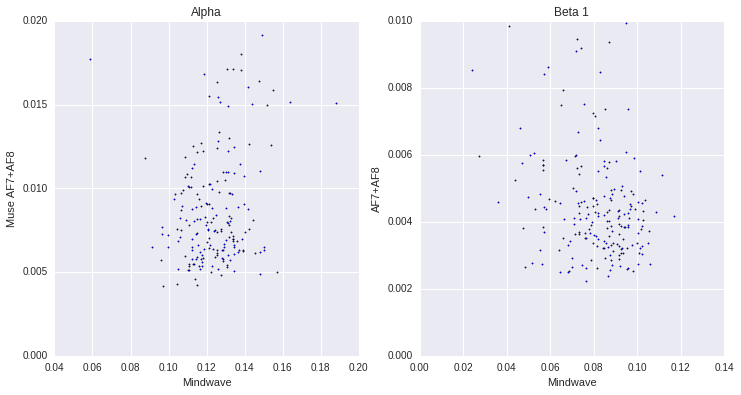

In [14]:
f,axes = plt.subplots(1,2, )
f.set_figwidth(12)
f.set_figheight(6)
ax = axes[0]

ax.set_title("Alpha")
#ax.xaxis.set_ticklabels("")
#ax.yaxis.set_ticklabels("")
ax.xaxis.set_label_text("Mindwave")
ax.yaxis.set_label_text("Muse AF7+AF8")
ax.scatter(df.mindwave_alpha, df.AF7_alpha+ df.AF8_alpha, s=2);
ax.set_xlim(0.04,0.2)
ax.set_ylim(0.0,0.02)

ax = axes[1]
ax.set_title("Beta 1")

ax.xaxis.set_label_text("Mindwave")

ax.yaxis.set_label_text("AF7+AF8")
ax.set_ylim(0.0,0.01)
ax.scatter(df.mindwave_beta_1, df.AF8_beta_1+ df.AF7_beta_1, s=2);
hide_code_in_slideshow()

# Other Stuff I've been up to...


## Porekit-Python
- Library for analysing Oxford Nanopore data "Genome Sequencing for Hackers"

## Presenting with Jupyter
- Workshop about presentation tricks

## Jupyter FlightGear
- https://github.com/akloster/jupyter-flightgear



Thank you for your Attention
=====

Twitter: @BayesianHorse
--------------------------
- Pysiology https://github.com/akloster/pysiology
- Table Cleaner https://github.com/akloster/table-cleaner
- Notebook Assets https://github.com/akloster/nb-assets